<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy

In [33]:
sales = [3505,2400,3027,2798,3700,3250,2689]

def do_stats(lst):
  mean = sum(lst)/len(lst)
  var_list = []
  for i in lst:
    var_list.append((i-mean)**2)
  var = sum(var_list)/len(var_list)
  std = var**.5
  return mean, var, std

print('mean, variance and standard deviation of sales:')
do_stats(sales)

mean, variance and standard deviation of sales:


(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

### using numpy

In [84]:
sales = np.array(sales)
customers = np.array([127, 80, 105, 92, 120, 115, 93])
sales_customers= np.array([sales,customers])
np.cov(sales_people)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

### using pandas


In [85]:
df = pd.DataFrame({'sales':sales,'customers':customers})
cov = df.cov()
cov

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [87]:
sales_std = np.std(sales,ddof=1)
customers_std = np.std(customers,ddof=1)

std_dict = {'sales':sales_std,'customers':customers_std}

cor = cov.copy()
for i in cor.columns:
  for j in cor.columns:
    cor.loc[i,j] = cor.loc[i,j]/(std_dict[i]*std_dict[j])
    
cor

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [88]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [95]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
#titanic = titanic.select_dtypes(exclude='object')  # not necessary, non-numerica columns are dropped by default
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [96]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

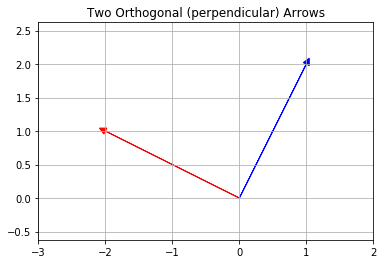

In [162]:
plt.axis('equal')
plt.xlim(-3,2)
plt.ylim(-1,3)
plt.arrow(0,0,1,2,head_length=.1,head_width=.1,color='b')
plt.arrow(0,0,-2,1,head_length=.1,head_width=.1,color='r')
plt.grid()
plt.title('Two Orthogonal (perpendicular) Arrows');

### synonym: perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [112]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

They are not orthogonal because they have a non-zero dot product

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [117]:
c = np.array([2,-15,6,20])

print('Norm squared')
print((np.linalg.norm(c))**2)

print('\nDot Product')
print(np.dot(c,c))

print('\nc-transpose c')
print(np.matmul(c.T,c))

Norm squared
665.0

Dot Product
665

c-transpose c
665


These are all the same. Norm squared of a vector is the dot product of the vector with itself. And for a column vector c, c-transpose matrix multiplied witth c is an alternatice definition of a dot product

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
+ 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$e = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} 
+ 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} 
- 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [118]:
f = np.array([4,12,11,9,2])

f = f/np.linalg.norm(f)

f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

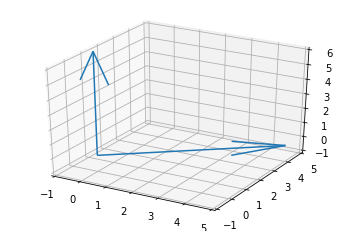

In [141]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.set_zlim(-1,6)
vectors = np.array([[0,0,0,5,4,0],[0,0,0,0,0,7]])
X,Y,Z,W,V,U =  zip(*vectors)
ax.quiver(X,Y,Z,W,V,U);

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

By inspection, h is just a multiple of g, so these vectors are linearly dependent. Thus the span can be described by the equation:

$ y = 2x $

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [144]:
lmn = np.array([[1,2,3],[-1,0,7],[4,8,2]])
sympy.Matrix(lmn).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

Because the matrix formed by lmn can reduce to the identity matrix, {lmn} spans and thus serves as a basis for R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



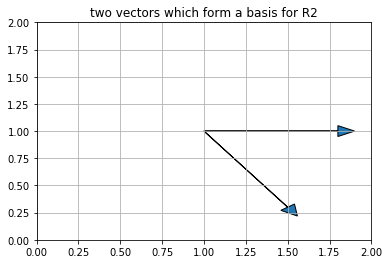

In [159]:
plt.xlim(0,2)
plt.ylim(0,2)
plt.arrow(1,1,.8,0,head_length=.1,head_width=.1)
plt.arrow(1,1,.5,-.7,head_length=.1,head_width=.1)
plt.grid()
plt.title('two vectors which form a basis for R2');

## 6.2 What does it mean to form a basis?

If vectors form a basis for some space, it means those vectors span that space and thus any vector living there can be represented by a linear combination of the basis vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

P is the same as lmn defined above. It reduced to the identity matrix, and so all columns are linearly independent. Given this fact, it has rank 3

## 7.2 What does the rank of a matrix tell us?

Rank 3 means 3 of the column vectors (in this case all of them) are linearly independent and thus can span the column space. As such these columns can be (ugly) basis vectors for R3

# Stretch - Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

$ v = \begin {bmatrix} 1 \\ 3 \end {bmatrix} = \begin {bmatrix} 1 \\ 0 \end {bmatrix} + 3 \begin {bmatrix} 0 \\ 1 \end {bmatrix} $ so it can be described by the equation $ y = 3x$

''

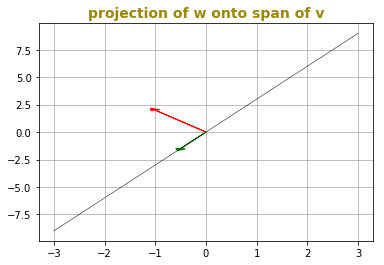

In [197]:
x_vals = np.array([-3,3]) # set some x values for L

w = np.array([-1,2])
v = np.array([1,3])
coef = np.dot(w,v)/np.dot(v,v)
proj = -coef * v  # coefficient negated for clarity of demonstration
                  # but direction doesn't matter since we are projecting onto L the span of v

plt.plot(x_vals,3*x_vals,color='black',lw=.5)  # plot L
plt.arrow(0,0,w[0],w[1],head_length=.2,head_width=.2,color='red') # plot w
plt.arrow(0,0,proj[0],proj[1],head_length=.2,head_width = .2,color='green') # plot projection
plt.grid(color='grey',lw=.5)
plt.title('projection of w onto span of v',size = 14,fontweight='bold',color='#9b870c')
;

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
def project_to_y_eq_x(x,y):
  new_vec = np.array([1,1]) # Establish new value where i and j are projected to
  x,y = np.array(x),np.array(y)
  pairs = np.array([x,y]).T
  new_pairs = []
  for vector in pairs:
    coef = np.dot(vector,new_vec)/np.dot(new_vec,new_vec)
    vector = coef * new_vec
    new_pairs.append(vector)
  new_pairs = np.array(new_pairs).T
  new_x, new_y = new_pairs[0],new_pairs[1]
  return new_x,new_y

In [0]:
# Set a dataframe to hold data for the projections
df3 = df2.copy() # holds x and y
df3['delta_x'] = df.x - df2.x # holds change in x
df3['delta_y'] = df.y - df2.y # holds change in y

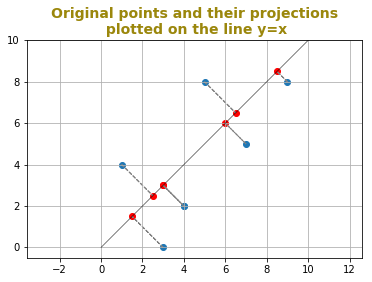

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}
df = pd.DataFrame(data)

new_x, new_y = project_to_y_eq_x(x_values,y_values)
data2 = {'x':new_x,'y':new_y}
df2 = pd.DataFrame(data2)

plt.scatter(df.x, df.y)
plt.scatter(df2.x,df2.y,color = 'r')
plt.plot([0,10],[0,10],color='black',lw=.5) #added to show y=x axis
plt.axis('equal') # Appeared skewed without this
plt.xlim(-1,10)
plt.ylim(-.5,10)

for i in range(df3.shape[0]):
  plt.arrow(df3.x[i],df3.y[i],df3.delta_x[i],df3.delta_y[i],ls='--',color='grey')

  plt.title('Original points and their projections\n plotted on the line y=x',
           fontweight='bold',size=14,color = '#9b870c')
  plt.grid()
plt.show()